In [2]:

import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Flatten, Dropout

print("Packages Successfully Imported!")


Packages Successfully Imported!


In [3]:
trainDataGen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
trainingSet = trainDataGen.flow_from_directory(r"C:\Users\vaish\Downloads\Brain Tumor Detection\dataset\train", target_size = (128, 128), batch_size = 32, class_mode = "binary")

Found 2800 images belonging to 2 classes.


In [4]:
trainingSet.class_indices

{'no': 0, 'yes': 1}

In [5]:
validDataGen = ImageDataGenerator(rescale = 1./255)
validSet = validDataGen.flow_from_directory(r"C:\Users\vaish\Downloads\Brain Tumor Detection\dataset\valid", target_size = (128, 128), batch_size = 32, class_mode = "binary")

Found 200 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, input_shape=(128, 128, 3), activation ='relu', padding = 'Same'))
model.add(Conv2D(32, kernel_size = 3,  activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size = 3, activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = 3, activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2, strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(loss = "binary_crossentropy", optimizer='Adamax', metrics=["accuracy"])

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [9]:
metricVals = model.fit(x = trainingSet, validation_data = validSet, epochs = 35, verbose = 2)

Epoch 1/35
88/88 - 315s - loss: 4.0555 - accuracy: 0.6704 - val_loss: 5.5991 - val_accuracy: 0.5050 - 315s/epoch - 4s/step
Epoch 2/35
88/88 - 238s - loss: 0.5428 - accuracy: 0.7371 - val_loss: 13.2393 - val_accuracy: 0.5000 - 238s/epoch - 3s/step
Epoch 3/35
88/88 - 179s - loss: 0.4963 - accuracy: 0.7754 - val_loss: 9.5289 - val_accuracy: 0.5000 - 179s/epoch - 2s/step
Epoch 4/35
88/88 - 179s - loss: 0.4209 - accuracy: 0.8100 - val_loss: 6.7419 - val_accuracy: 0.5200 - 179s/epoch - 2s/step
Epoch 5/35
88/88 - 165s - loss: 0.3765 - accuracy: 0.8268 - val_loss: 4.1887 - val_accuracy: 0.5450 - 165s/epoch - 2s/step
Epoch 6/35
88/88 - 171s - loss: 0.3490 - accuracy: 0.8450 - val_loss: 2.0041 - val_accuracy: 0.6200 - 171s/epoch - 2s/step
Epoch 7/35
88/88 - 205s - loss: 0.3334 - accuracy: 0.8571 - val_loss: 1.3269 - val_accuracy: 0.6700 - 205s/epoch - 2s/step
Epoch 8/35
88/88 - 225s - loss: 0.2884 - accuracy: 0.8804 - val_loss: 0.7539 - val_accuracy: 0.7050 - 225s/epoch - 3s/step
Epoch 9/35
88/8

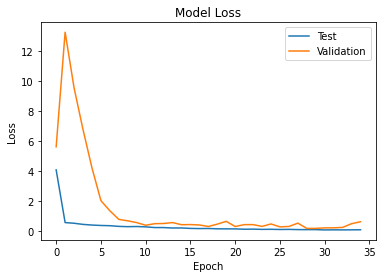

In [10]:
plt.plot(metricVals.history['loss'])
plt.plot(metricVals.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

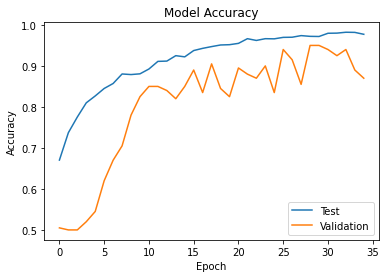

In [11]:
plt.plot(metricVals.history['accuracy'])
plt.plot(metricVals.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='lower right')
plt.show()

In [12]:
model.save("BrainTumorClassifier.h5")

In [13]:
cnn = load_model("BrainTumorClassifier.h5")

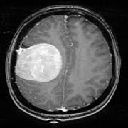

100.0 % chance of Brain Tumor.
Yes


In [14]:
test = image.load_img("dataset/test/Y1.jpg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

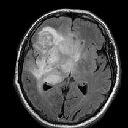

100.0 % chance of Brain Tumor.
Yes


In [15]:
test = image.load_img("dataset/test/Y2.jpg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

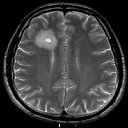

99.99374151229858 % chance of Brain Tumor.
Yes


In [16]:
test = image.load_img("dataset/test/Y3.jpg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

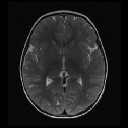

0.0007617511073476635 % chance of Brain Tumor.
No


In [17]:
test = image.load_img("dataset/test/N1.jpeg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

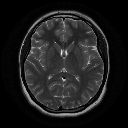

1.3313508873125102e-05 % chance of Brain Tumor.
No


In [18]:
test = image.load_img("dataset/test/N2.jpeg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

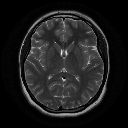

1.3313508873125102e-05 % chance of Brain Tumor.
No


In [19]:
test = image.load_img("dataset/test/N2.jpeg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")
